<a href="https://colab.research.google.com/github/Morgoth636/ML_WS22-23/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Dataset

In this task with the dataset, the age of the abalone should be predicted with the physical measurements. In general, the age is determined by cutting the shell through the cone, staining after that, and counting the number of rings present through the microscope.

In [ ]:
# Importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1. Analyzing Data

### Initializing the dataframe

In [ ]:
df = pd.read_csv('abalone.csv')

### Overview of data

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Attributes
There are 9 attributes. These attributes are the columns of the data set. The age column is not included in the dataset. But in the description it is given that age = Rings + 1.5.

1.	Sex – The  data type is categorical and there are three types in this data. M, F and I. 
2.	Length – It is the continuous datatype and the units are in mm. It is the longest shell measurement. 
3.	Diameter – It is also continuous datatype and the units are in mm. It is the perpendicular to length. 
4.	Height – It is a continuous data type. It is numerical just like diameter and length. Its units are in mm and it is the meat in the shell. 
5.	Whole weight – A continuous data measured in grams. It is the weight of whole abalone. 
6.	Shucked weight – It is same as whole weight, continuous data, measured in grams and it is the weight of the meat. 
7.	Viscera weight – It is also continuous data, measured in grams and it is the git weight after bleeding. 
8.	Shell weight – It is the weight of the shell after being dried. It is continuously varying data. 
9.	Rings – It is an integer and adding 1.5 to rings gives the age of the abalone. 


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Correction for false values

Height has a minimum of 0, which can´t be possible

In [ ]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [ ]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Remove from dataset

In [ ]:
df1 = df[df.Height != 0]
df = df1
df.describe()
df['Height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

### Correlations

<AxesSubplot:>

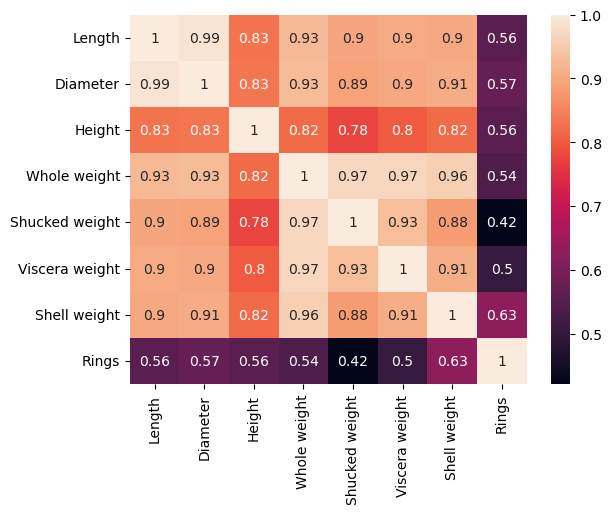

In [ ]:
df.corr()
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

# 2. Preparing data

## Checking for missing values

In [ ]:
#checking for missing values
df.isna().sum() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


From the info printed above, it is evident that there is only one categorical data (Sex) and there are 7 float64 columns and one integer columns.

## Data visualization

<Figure size 1200x1000 with 0 Axes>

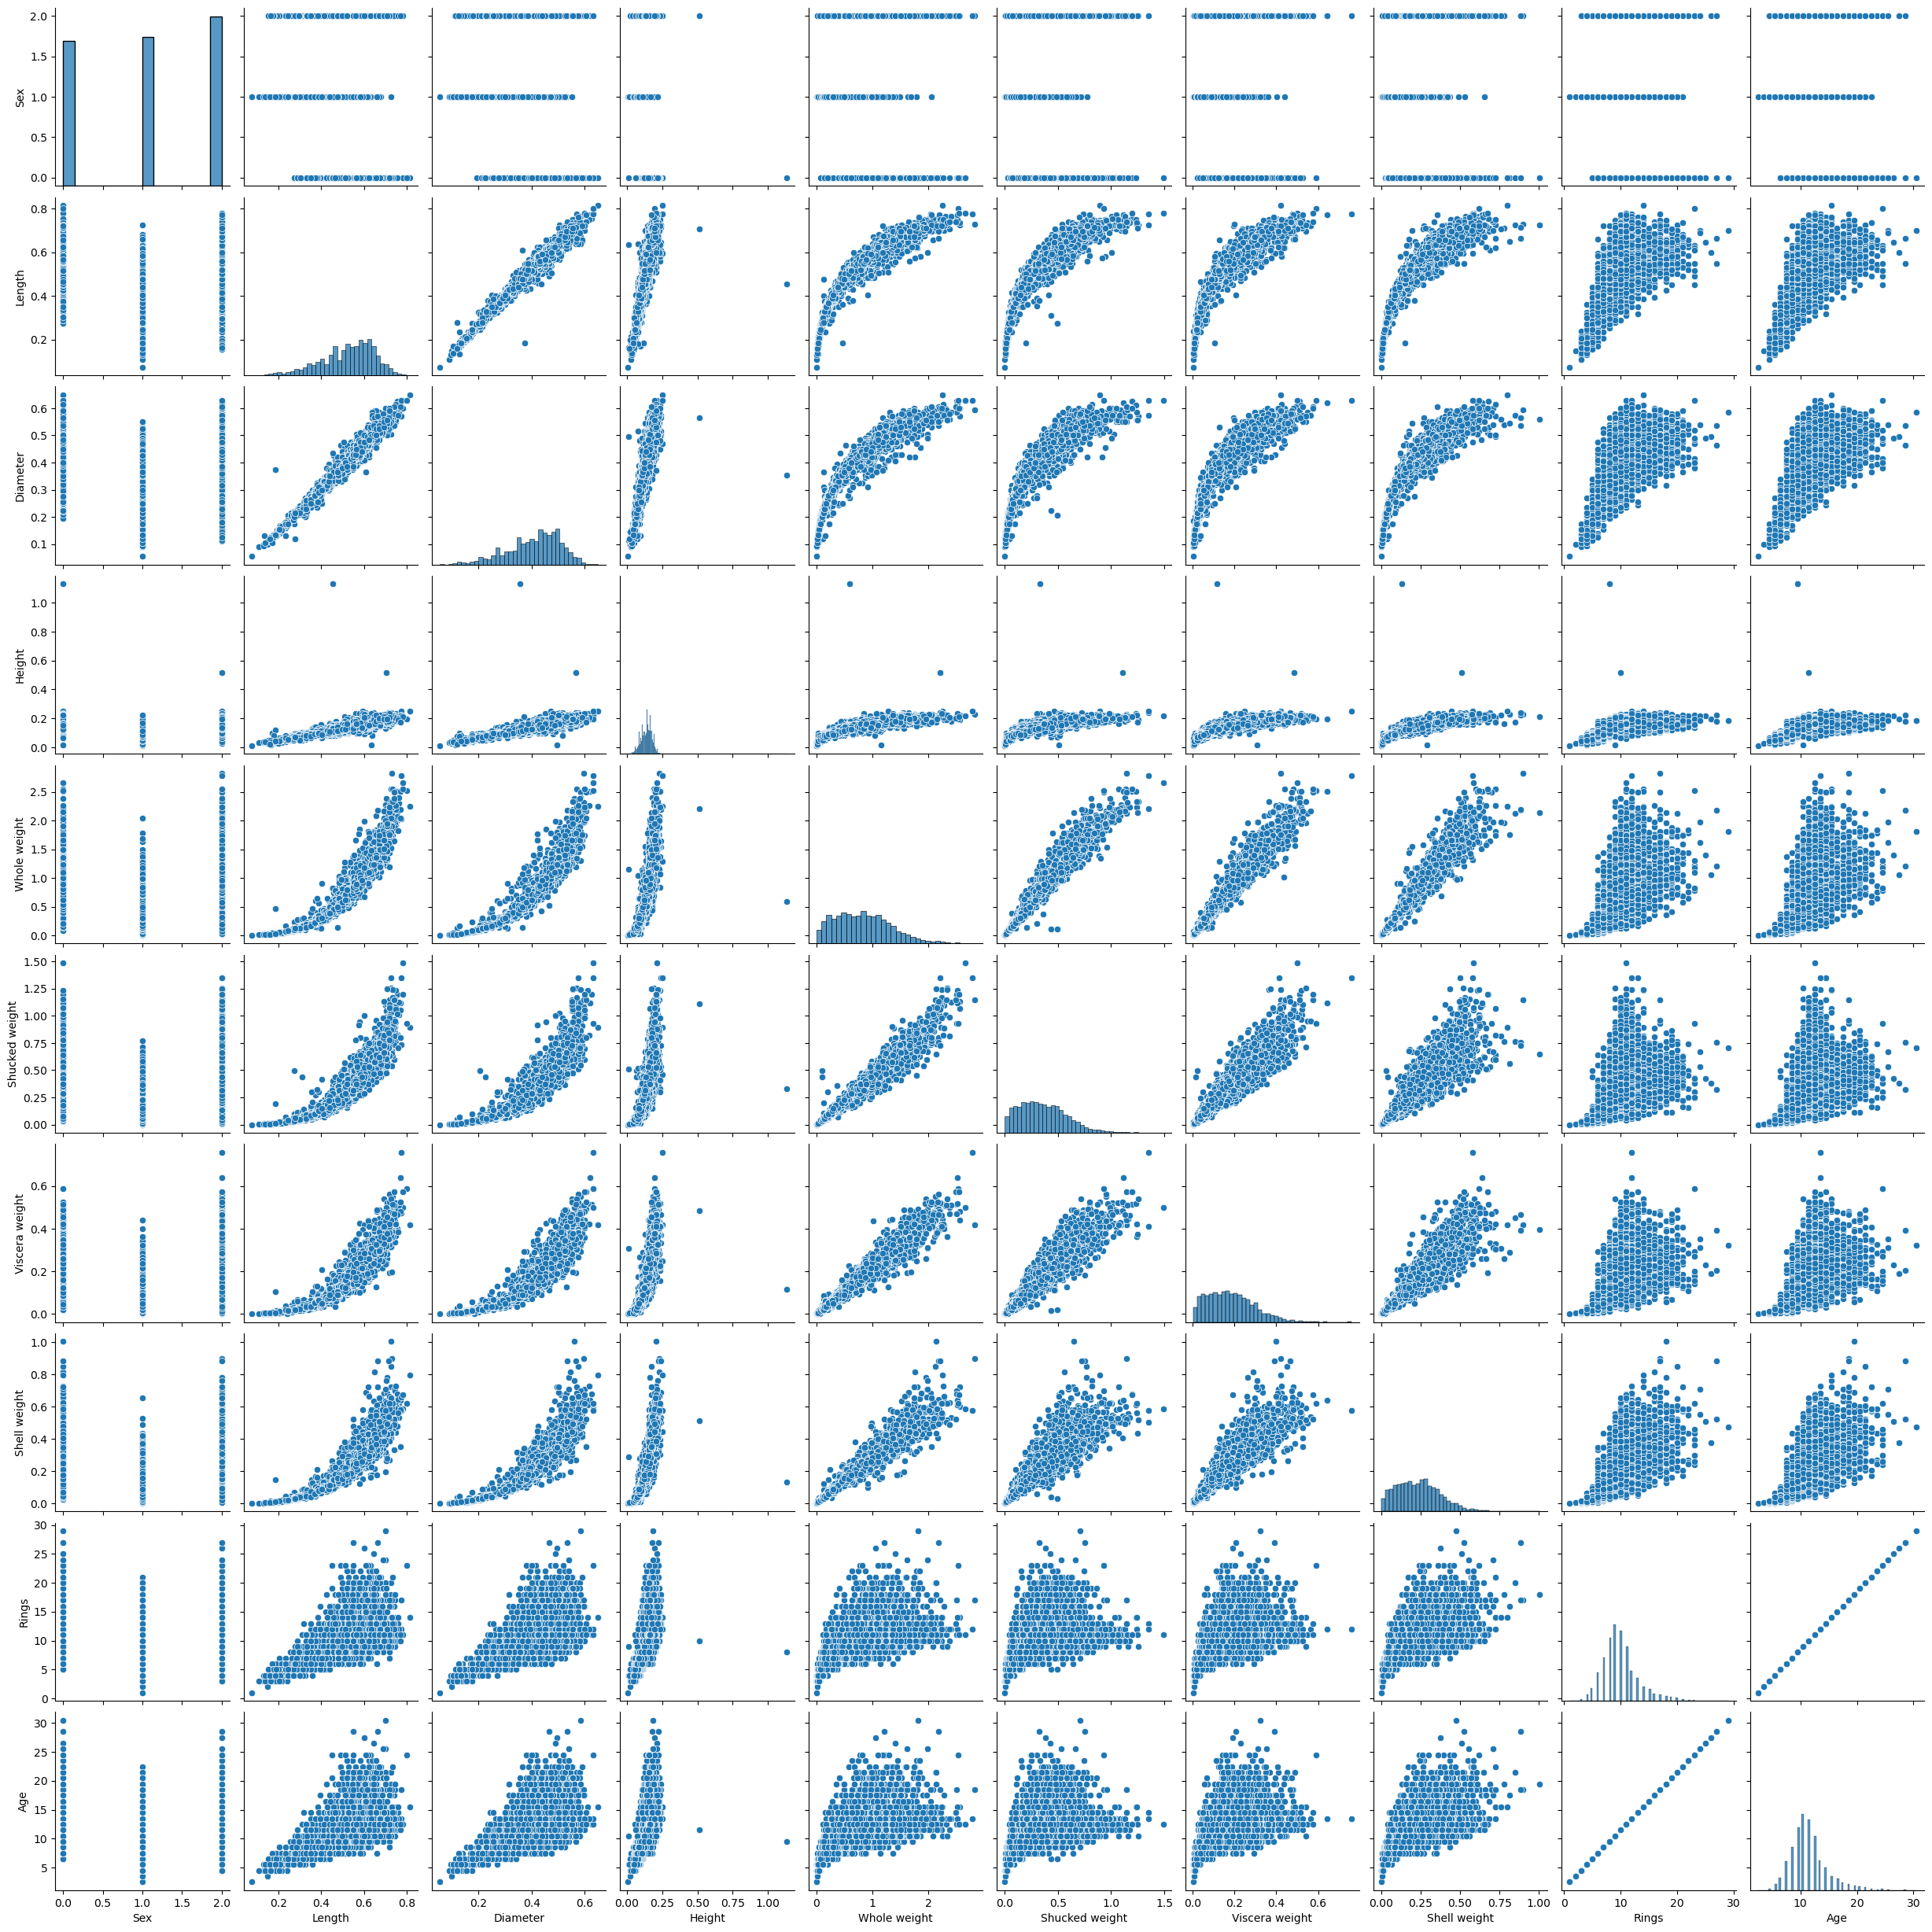

In [ ]:
#plotting a pair plot to check
plt.figure(2, figsize = (12, 10))
sns.pairplot(df)

### Transforming ( Encoding ) gender

<AxesSubplot:xlabel='Sex', ylabel='count'>

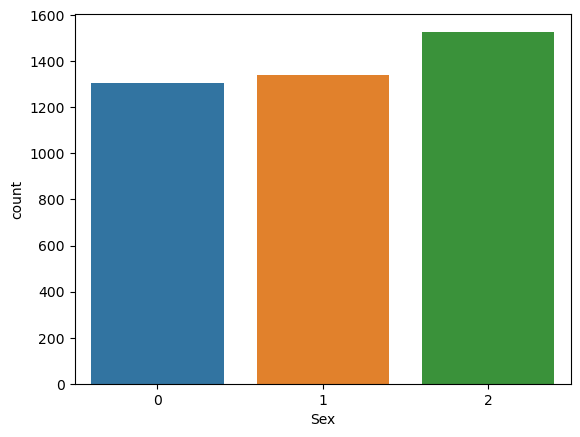

In [ ]:
sns.countplot(df.Sex)

The above plot infers that the males dominate the other categories

<Figure size 1200x1000 with 0 Axes>

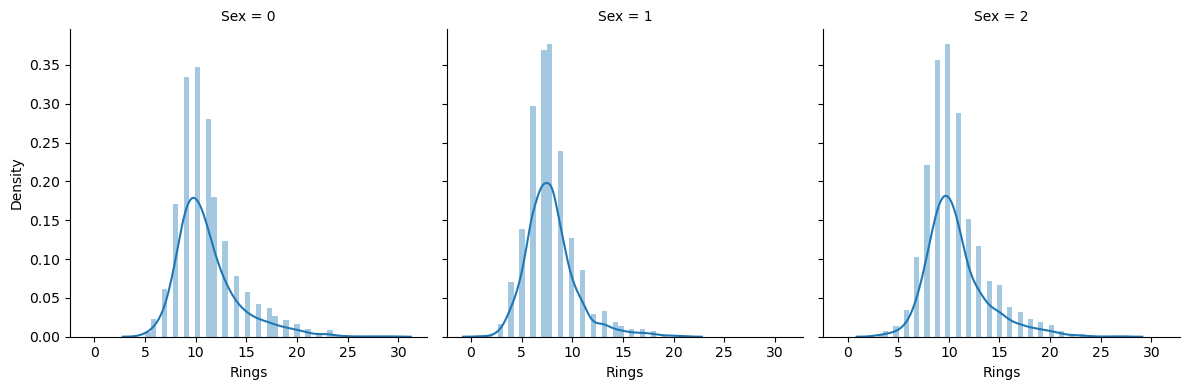

In [ ]:
# Exploring gender feature
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Sex', height = 4)
g.map(sns.distplot, 'Rings')

## Label Encoding

In [ ]:
# columns are created for the categories in Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex)
 # columns are included in df now

Like with trees, you can calculate the age of an abalone with its rings.

age = 1,5 + rings

This is done and added into the main data frame because, the task is to predict the age. A count plot is drawn to visualize the age distribution on the data. 

<AxesSubplot:xlabel='Age', ylabel='count'>

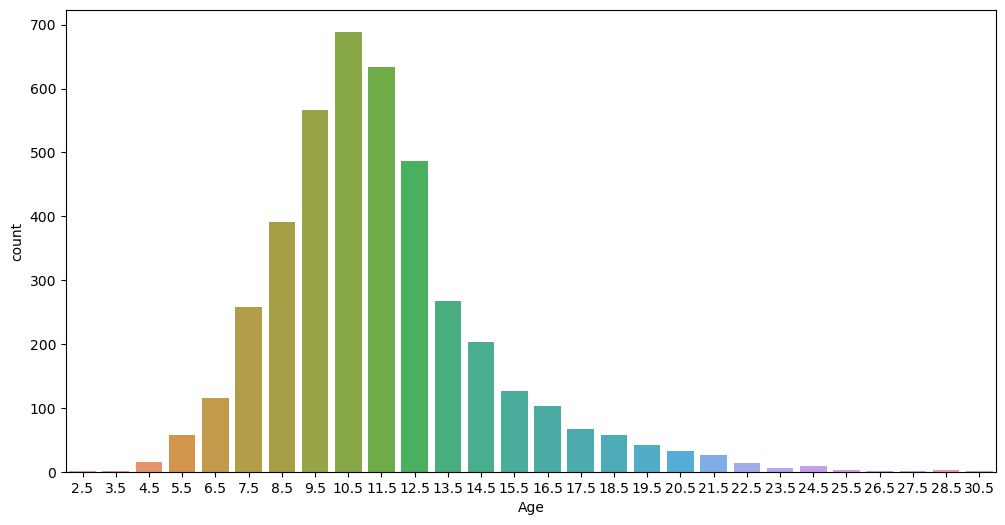

In [ ]:
#as per description age = number of rings + 1.5
df['Age'] = df.Rings + 1.5
df['Age'].describe()
#lets check the age plot
plt.figure(4, figsize=(12, 6))
sns.countplot(df['Age'])

The plot says that the age group of 7.5 and 15 has the greatest number of samples. The age feature is divided into two classes: 

0 for: age < 8 <br>
1 for: age >= 8

<AxesSubplot:xlabel='AgeIndex', ylabel='count'>

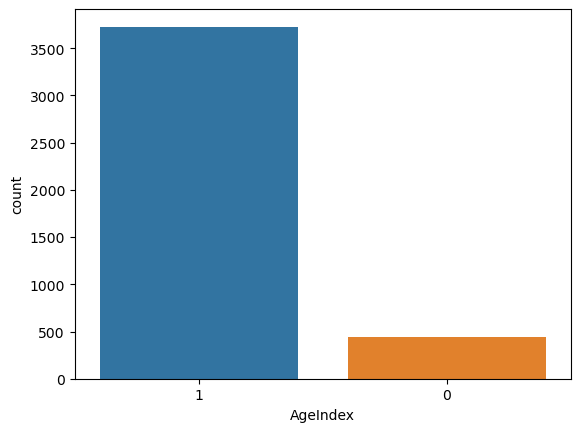

In [ ]:
AgeValues = df['Age'].values
AgeIndex = []
# 0 is young, 1 is old
for age in AgeValues:
    if age <8:
        AgeIndex.append('0')
    else:
        AgeIndex.append('1')

AgeIndex = pd.DataFrame(data = AgeIndex, columns = ['AgeIndex'])
df1.reset_index(drop=True, inplace=True)
AgeIndex.reset_index(drop = True, inplace = True)
newDf = pd.concat([df, AgeIndex], axis = 1)

plt.figure(5)
sns.countplot(newDf['AgeIndex'])

In [1]:
newDf.drop(['AgeIndex', 'Sex'], axis = 1, inplace = True)
y = AgeIndex.values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(newDf)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size=0.4)


NameError: ignored

# 2. Training models

## 2.1 Classification Model


The classification model used here is Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train, y_train)

y_pred = svcModel.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracyScore = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracyScore}')
print(f'Confusion Matrix: \n{confusionMatrix}')

Accuracy Score: 0.9988023952095808
Confusion Matrix: 
[[ 169    2]
 [   0 1499]]


### K-Fold Cross Validation

![grid_search_cross_validation.png](attachment:grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svcModel, X, y, cv=10) 
avgScore = scores.mean()
print("Average Accuracy Score of the model with 10k folds", avgScore)

The Average Accuracy Score of the model with 10k folds 0.9995215311004785


## 2.2 Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

regModel = LinearRegression()
regModel.fit(X_train, y_train)

y_pred_train = regModel.predict(X_train)

#evaluating model on train set
kfold = KFold(n_splits = 5)
cv_results = cross_val_score(regModel, X_train, y_train, scoring='neg_mean_squared_error', cv = kfold)

# 3. Evaluation

In [ ]:
y_pred_train = regModel.predict(X_train)
y_pred = regModel.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)
r2Score = r2_score(y_test, y_pred)
print('R2 Score', r2Score)


Mean Absolute Error 0.15154335434287158
Mean Squared Error 0.04987878183627167
R2 Score 0.45731097666210985
